In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [2]:
data = pd.read_csv(r"C:\Users\kapil\Desktop\Projects\Machine Learning\Bank Customer Churn Prediction\Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
data = pd.get_dummies(data,drop_first=True)

In [15]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\kapil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

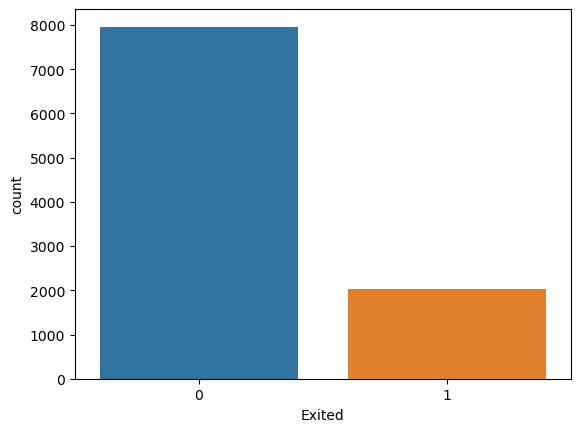

In [17]:
sns.countplot(data['Exited'])

In [18]:
X = data.drop('Exited',axis=1)
y = data['Exited']


In [19]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [20]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [22]:
sc= StandardScaler()

In [23]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[ 0.07179928,  1.00383792, -0.65432278, ...,  1.74926006,
        -0.46475472, -0.84661075],
       [ 1.09976205,  0.10067445, -1.38861674, ..., -0.57167029,
        -0.46475472,  1.18118037],
       [ 0.04992773,  0.70278343, -1.75576372, ..., -0.57167029,
         2.15167263, -0.84661075],
       ...,
       [ 0.20302857,  0.20102595,  1.18141213, ..., -0.57167029,
        -0.46475472,  1.18118037],
       [-0.99990659,  0.50208044,  0.07997118, ...,  1.74926006,
        -0.46475472, -0.84661075],
       [ 0.53110179,  1.00383792, -1.38861674, ...,  1.74926006,
        -0.46475472,  1.18118037]])

In [25]:
log = LogisticRegression()


In [26]:
log.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred1 = log.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred1)

0.783427495291902

In [29]:
svm = svm.SVC()

In [30]:
svm.fit(X_train,y_train)

SVC()

In [31]:
y_pred2 = svm.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred2)

0.8383553044569994

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred3 = knn.predict(X_test)

C:\Users\kapil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
accuracy_score(y_test,y_pred3)

0.8151286880100439

In [37]:
dt = DecisionTreeClassifier()

In [38]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred4 = dt.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred4)

0.7991211550533585

In [41]:
rf = RandomForestClassifier()

In [42]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred5 = rf.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred5)

0.8559322033898306

In [45]:
gbc = GradientBoostingClassifier()

In [46]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [47]:
y_pred6 = gbc.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred6)

0.8392969240426867

In [49]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [50]:
final_data

,Models,ACC
0,LR,0.783427
1,SVC,0.838355
2,KNN,0.815129
3,DT,0.799121
4,RF,0.855932
5,GBC,0.839297


C:\Users\kapil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

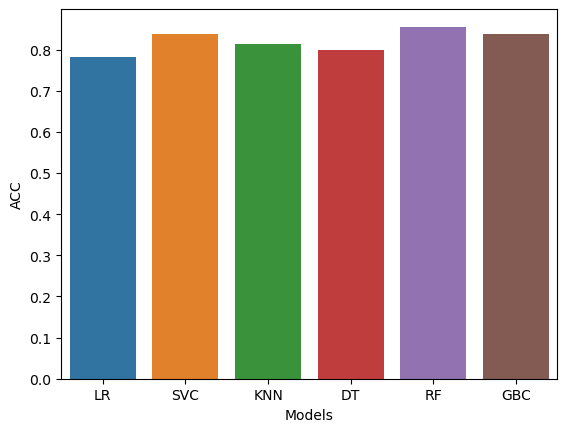

In [51]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [52]:
X_res=sc.fit_transform(X_res)

In [53]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [54]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [55]:
model = joblib.load('churn_predict_model')

In [56]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [57]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)